In [3]:
import csv
import numpy
import pandas as pd
import os
import peakutils
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
from scipy.signal import argrelextrema
import cv2

FOUND x = 92 - 103 Y = 91 - 98
coord


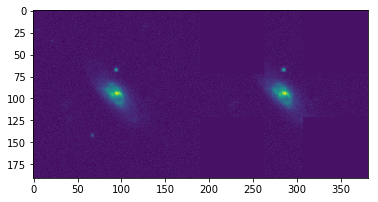

FOUND x = 63 - 72 Y = 67 - 73
coord


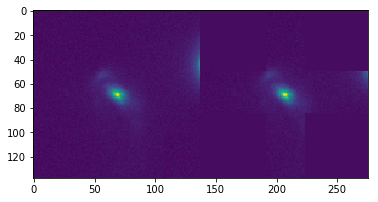

coord


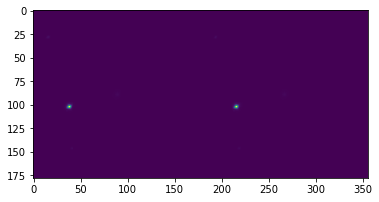

FOUND x = 45 - 69 Y = 57 - 75
coord


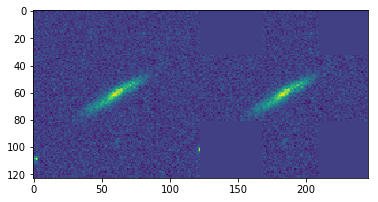

coord


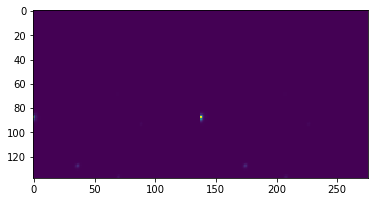

coord


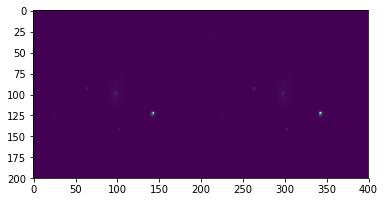

coord


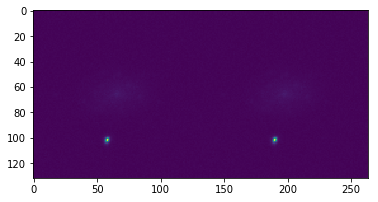

FOUND x = 65 - 69 Y = 65 - 69
coord


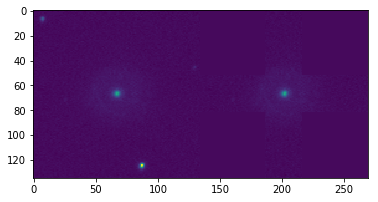

coord


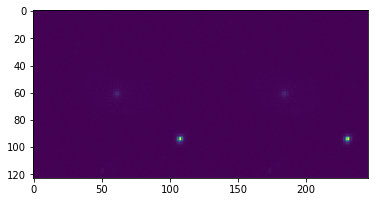

FOUND x = 73 - 77 Y = 73 - 77
coord


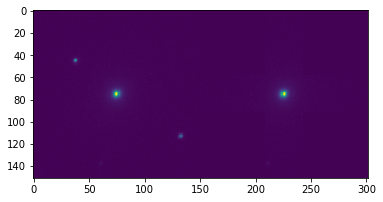

coord


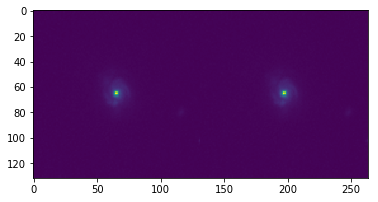

FOUND x = 73 - 77 Y = 73 - 77
coord


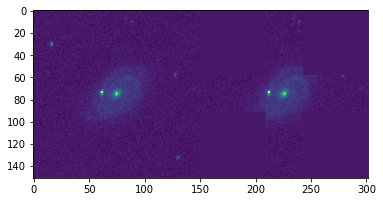

coord


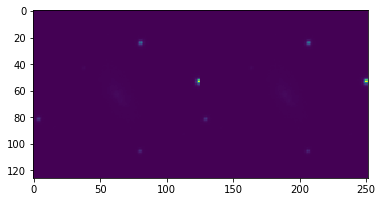

FOUND x = 64 - 67 Y = 64 - 67
coord


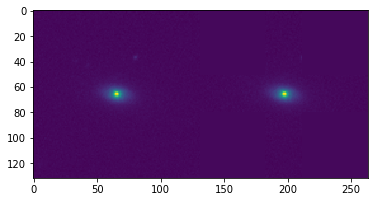

FOUND x = 64 - 69 Y = 60 - 70
coord


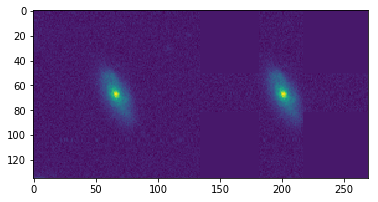

coord


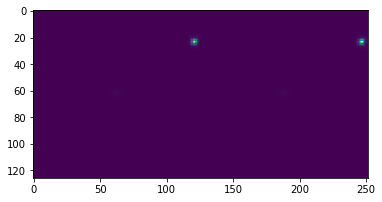

coord


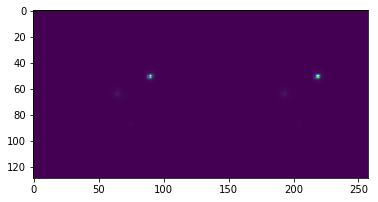

coord


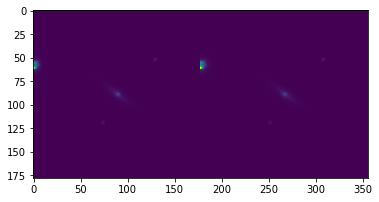

FOUND x = 98 - 102 Y = 97 - 101
coord


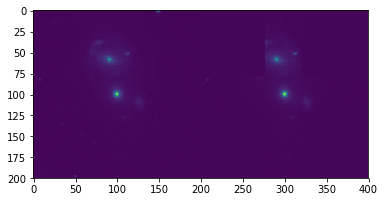

coord


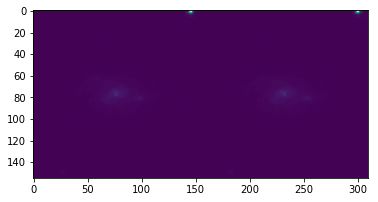

coord


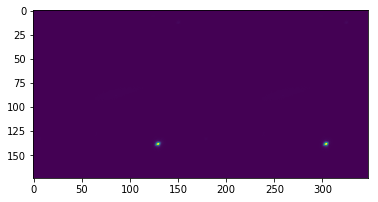

FOUND x = 70 - 74 Y = 69 - 74
coord


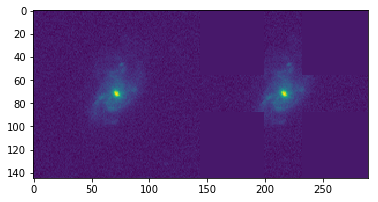

coord


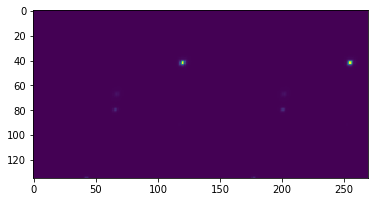

FOUND x = 56 - 69 Y = 44 - 74
coord


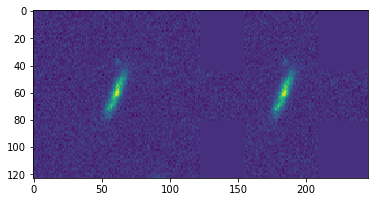

coord


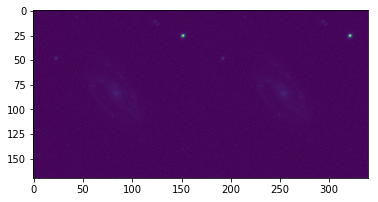

FOUND x = 73 - 79 Y = 71 - 90
coord


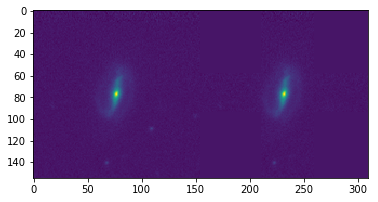

coord


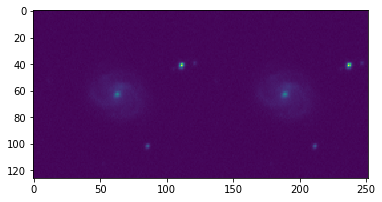

coord


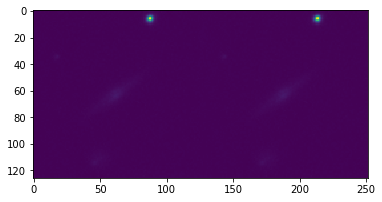

coord


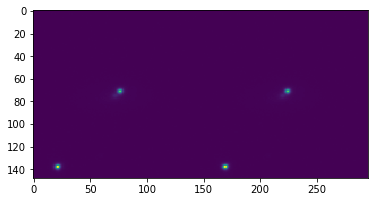

FOUND x = 111 - 115 Y = 112 - 117
coord


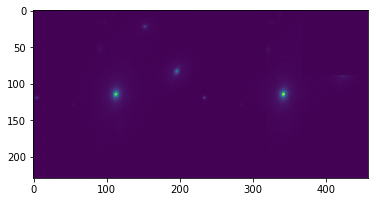

coord


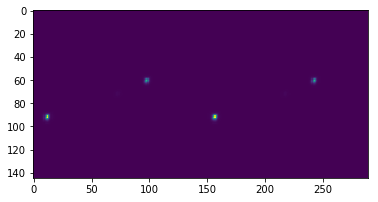

FOUND x = 64 - 67 Y = 64 - 67
coord


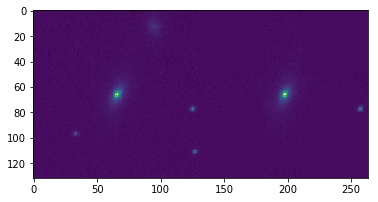

coord


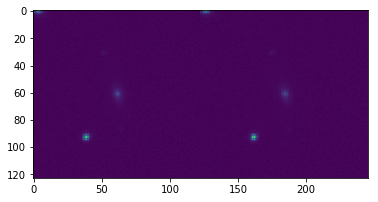

FOUND x = 61 - 66 Y = 47 - 77
coord


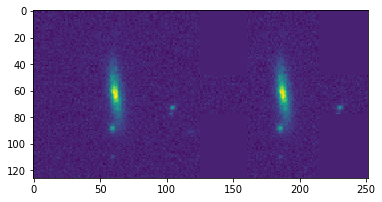

FOUND x = 67 - 83 Y = 65 - 87
coord


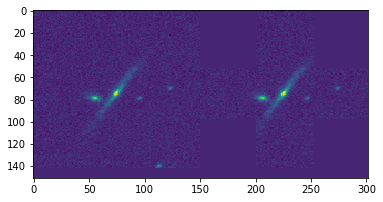

coord


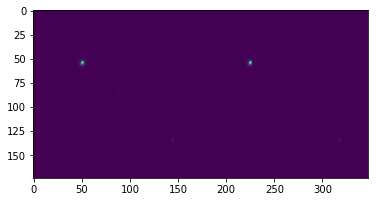

FOUND x = 52 - 65 Y = 60 - 65
coord


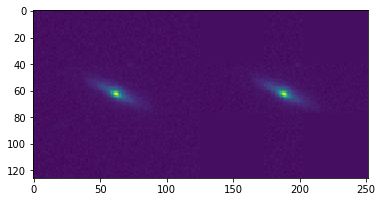

FOUND x = 124 - 130 Y = 112 - 138
coord


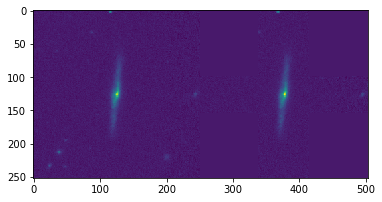

coord


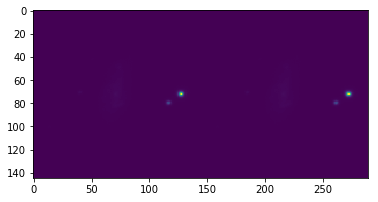

FOUND x = 64 - 67 Y = 64 - 67
coord


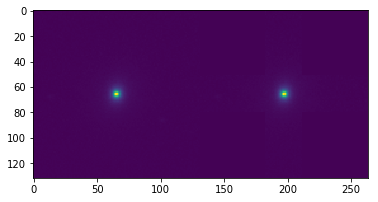

coord


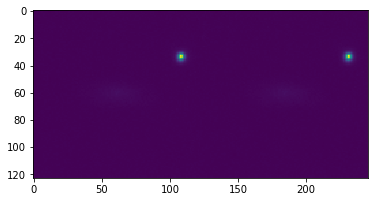

FOUND x = 63 - 68 Y = 63 - 68
coord


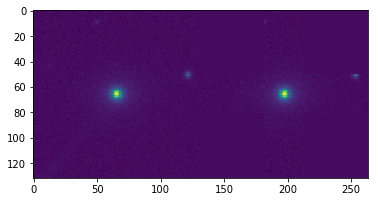

FOUND x = 69 - 84 Y = 72 - 77
coord


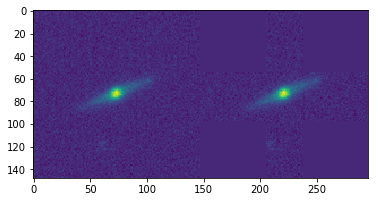

coord


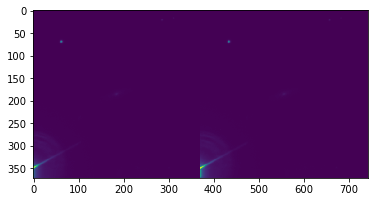

coord


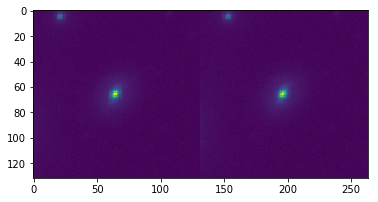

coord


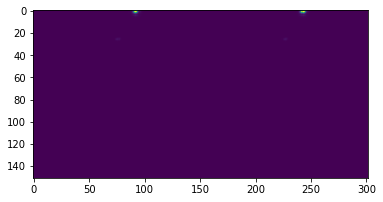

FOUND x = 60 - 64 Y = 59 - 63
coord


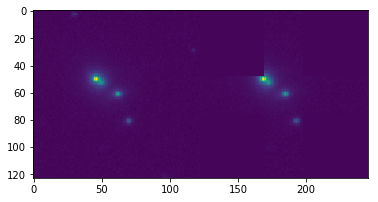

coord


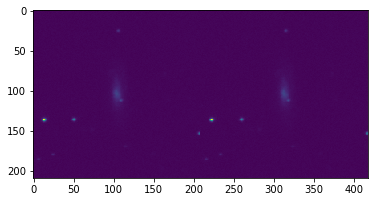

FOUND x = 60 - 64 Y = 59 - 63
coord


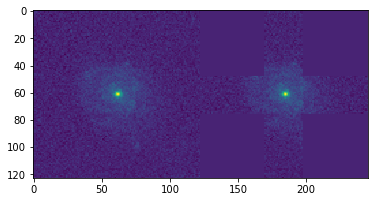

coord


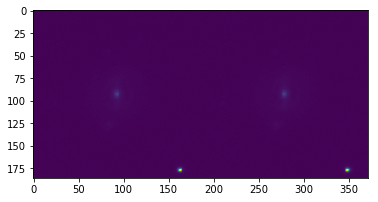

coord


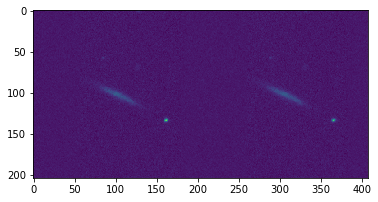

FOUND x = 183 - 188 Y = 183 - 188
coord


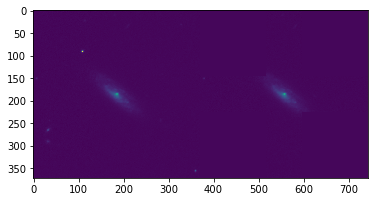

coord


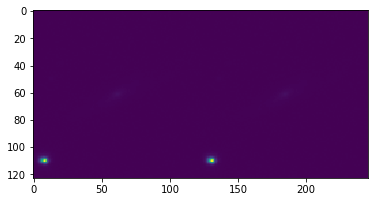

In [4]:
df = pd.read_csv('hack/data/sample.csv',sep=';')
ids = df.SDSS_ID.values

g_input = ['hack/data/Sample_Data/SAMPLE/'+str(id)+'-g.csv' for id in ids]
i_input = ['hack/data/Sample_Data/SAMPLE/'+str(id)+'-i.csv' for id in ids]

from PIL import Image
def conturs2(arr) :
    larr = arr-numpy.min(arr)
    larr /= numpy.max(larr)
    im = numpy.array(larr * 255, dtype = numpy.uint8)
    img = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
    #plt.imshow(img, origin='lower')
    #plt.show()
    
    height, width = arr.shape
    middle = int(width/2)
    delta = int(width/10)

    bilateral_filtered_image = cv2.bilateralFilter(img, 5, 200, 200)
    img = cv2.Canny(bilateral_filtered_image, 100, 200)
    
    #
    
    #plt.imshow(img, origin='lower')
    #plt.show()
    
    im2,contours,hierarchy = cv2.findContours(img, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    #print('contours %s'% len(contours))
    for i in range(len(contours)):
        mycontour = contours[i]
        x = []
        y = []
        for j in  range(len(mycontour)):
            x.append(mycontour[j][0][0])
            y.append(mycontour[j][0][1])
        #print('>> %s , %s ' % ( x, y))
        x.sort()
        y.sort()
        if middle > x[0] and middle < x[-1] and middle > y[0] and middle < y[-1] :
            print('FOUND x = %s - %s Y = %s - %s' % (x[0], x[-1], y[0], y[-1]) )
            return [x[0] -delta, x[-1] + delta, y[0] - delta, y[-1] + delta]
    return None

def preprocessImage(arr, outputFile):   
    filtered = numpy.array(arr, copy=True)
    #filtered.shape[0]
    coord = conturs2(arr)
    print('coord')
    #numpy.save(outputFile, filtered)
    if(coord != None):
        for x in range(filtered.shape[0]):
            for y in range(filtered.shape[1]):
                if(not x in range(coord[0], coord[1]) and not y in range(coord[2], coord[3]) ) :
                    filtered[x][y] = 0
 
    img = numpy.hstack((arr, filtered))
    plt.imshow(img)
    plt.show()
   
    
    #edge_detected_image = cv2.Canny(img, 75, 200)
    #im2,contours,hierarchy = cv2.findContours(img, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    #print('contours %s'% len(contours))

filename = "hack/data/Sample_Data/SAMPLE/1237648674529476964-g.csv"
arr = numpy.genfromtxt (filename, delimiter=",")

#conturs2(arr)
for i in range(len(ids)):
    file_g = numpy.genfromtxt(g_input[i], delimiter=",")
    #conturs2(file_g)
    preprocessImage(file_g,'')